In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

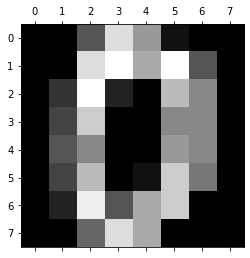

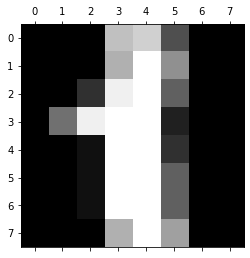

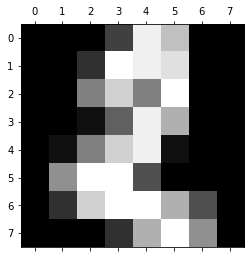

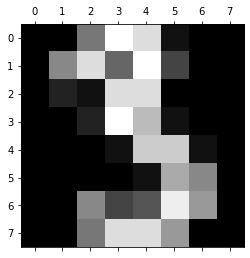

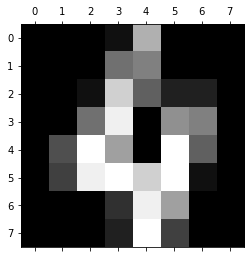

In [7]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [8]:
df = pd.DataFrame(digits.data)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
df['target'] = digits.target

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = RandomForestClassifier(n_estimators=30)

In [50]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
model.score(x_test, y_test)

0.9861111111111112

In [52]:
from sklearn.metrics import confusion_matrix

In [60]:
cm = confusion_matrix(y_test, model.predict(x_test))

In [61]:
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 24]], dtype=int64)

Text(24.0, 0.5, 'Truth')

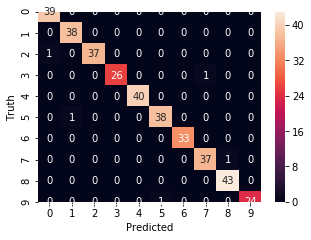

In [64]:
import seaborn as sn
plt.figure(figsize = (5, 3.5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')